In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from Utils.Data_processing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
df = pd.read_csv(r'Data\train.csv')
print(df.shape)
df.head()

(115488, 3)


id        class segmentation
0  case123_day20_slice_0001  large_bowel          NaN
1  case123_day20_slice_0001  small_bowel          NaN
2  case123_day20_slice_0001      stomach          NaN
3  case123_day20_slice_0002  large_bowel          NaN
4  case123_day20_slice_0002  small_bowel          NaN

In [23]:
# df = rename_df(df)
# df_train, train_ids, valid_ids, test_ids = read_data_path(df)
# train_generator, val_generator, train_generator0, val_generator0, train_generator1, val_generator1, train_generator2, val_generator2 = data_gene(df_train, train_ids, valid_ids, test_ids)

In [24]:
df.rename(columns = {'class':'class_name'}, inplace = True)
#--------------------------------------------------------------------------
df["case"] = df["id"].apply(lambda x: int(x.split("_")[0].replace("case", "")))
df["day"] = df["id"].apply(lambda x: int(x.split("_")[1].replace("day", "")))
df["slice"] = df["id"].apply(lambda x: x.split("_")[3])
df.head()

id   class_name segmentation  case  day slice
0  case123_day20_slice_0001  large_bowel          NaN   123   20  0001
1  case123_day20_slice_0001  small_bowel          NaN   123   20  0001
2  case123_day20_slice_0001      stomach          NaN   123   20  0001
3  case123_day20_slice_0002  large_bowel          NaN   123   20  0002
4  case123_day20_slice_0002  small_bowel          NaN   123   20  0002

In [25]:
TRAIN_DIR="Data/train"
# get all the image path with glob
all_train_images = glob(os.path.join(TRAIN_DIR, "**", "*.png"), recursive=True)
x = all_train_images[0].rsplit("/", 4)[0] ## ../input/uw-madison-gi-tract-image-segmentation/train

path_partial_list = []
for i in range(0, df.shape[0]):
    path_partial_list.append(os.path.join(x,
                          "case"+str(df["case"].values[i]),
                          "case"+str(df["case"].values[i])+"_"+ "day"+str(df["day"].values[i]),
                          "scans",
                          "slice_"+str(df["slice"].values[i])))
df["path_partial"] = path_partial_list
df['path_partial'] = df['path_partial'].apply(lambda x: x.replace("Data","Data/train"))
df.head()

id   class_name segmentation  case  day slice  \
0  case123_day20_slice_0001  large_bowel          NaN   123   20  0001   
1  case123_day20_slice_0001  small_bowel          NaN   123   20  0001   
2  case123_day20_slice_0001      stomach          NaN   123   20  0001   
3  case123_day20_slice_0002  large_bowel          NaN   123   20  0002   
4  case123_day20_slice_0002  small_bowel          NaN   123   20  0002   

                                        path_partial  
0  Data/train\case123\case123_day20\scans\slice_0001  
1  Data/train\case123\case123_day20\scans\slice_0001  
2  Data/train\case123\case123_day20\scans\slice_0001  
3  Data/train\case123\case123_day20\scans\slice_0002  
4  Data/train\case123\case123_day20\scans\slice_0002

In [26]:
df[~(df['segmentation'].isnull())].head()

id class_name  \
194  case123_day20_slice_0065    stomach   
197  case123_day20_slice_0066    stomach   
200  case123_day20_slice_0067    stomach   
203  case123_day20_slice_0068    stomach   
206  case123_day20_slice_0069    stomach   

                                          segmentation  case  day slice  \
194  28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...   123   20  0065   
197  27561 8 27825 11 28090 13 28355 14 28620 15 28...   123   20  0066   
200  15323 4 15587 8 15852 10 16117 11 16383 12 166...   123   20  0067   
203  14792 5 15056 9 15321 11 15587 11 15852 13 161...   123   20  0068   
206  14526 6 14789 12 15054 14 15319 16 15584 17 15...   123   20  0069   

                                          path_partial  
194  Data/train\case123\case123_day20\scans\slice_0065  
197  Data/train\case123\case123_day20\scans\slice_0066  
200  Data/train\case123\case123_day20\scans\slice_0067  
203  Data/train\case123\case123_day20\scans\slice_0068  
206  Data/train\case123\case123_day20\scans\slice_0069

In [27]:
path_partial_list = []
for i in range(0, len(all_train_images)):
    path_partial_list.append(str(all_train_images[i].rsplit("_",4)[0]))
    
tmp_df = pd.DataFrame()
tmp_df['path_partial'] = path_partial_list
tmp_df['path'] = all_train_images


In [28]:
df = df.merge(tmp_df, on="path_partial").drop(columns=["path_partial"])
# -4 as we don't need the '.png'
df["width"] = df["path"].apply(lambda x: int(x[:-3].rsplit("_",4)[1]))
df["height"] = df["path"].apply(lambda x: int(x[:-3].rsplit("_",4)[2]))
#--------------------------------------------------------------------------
del x,path_partial_list,tmp_df
#--------------------------------------------------------------------------
print(df.shape)
df.head(5)

(115488, 9)


id   class_name segmentation  case  day slice  \
0  case123_day20_slice_0001  large_bowel          NaN   123   20  0001   
1  case123_day20_slice_0001  small_bowel          NaN   123   20  0001   
2  case123_day20_slice_0001      stomach          NaN   123   20  0001   
3  case123_day20_slice_0002  large_bowel          NaN   123   20  0002   
4  case123_day20_slice_0002  small_bowel          NaN   123   20  0002   

                                                path  width  height  
0  Data/train\case123\case123_day20\scans\slice_0...    266     266  
1  Data/train\case123\case123_day20\scans\slice_0...    266     266  
2  Data/train\case123\case123_day20\scans\slice_0...    266     266  
3  Data/train\case123\case123_day20\scans\slice_0...    266     266  
4  Data/train\case123\case123_day20\scans\slice_0...    266     266

In [29]:
# RESTRUCTURE  DATAFRAME
df_train = pd.DataFrame({'id':df['id'][::3]})

df_train['large_bowel'] = df['segmentation'][::3].values
df_train['small_bowel'] = df['segmentation'][1::3].values
df_train['stomach'] = df['segmentation'][2::3].values

df_train['path'] = df['path'][::3].values
df_train['case'] = df['case'][::3].values
df_train['day'] = df['day'][::3].values
df_train['slice'] = df['slice'][::3].values
df_train['width'] = df['width'][::3].values
df_train['height'] = df['height'][::3].values


df_train.reset_index(inplace=True,drop=True)
df_train.fillna('',inplace=True); 
# the count columns store the number of mask the exist in image
df_train['count'] = np.sum(df_train.iloc[:,1:4]!='',axis=1).values
print(df_train.shape)
df_train.sample(5)

(38496, 11)


id  \
15539  case135_day17_slice_0020   
24655  case108_day13_slice_0096   
22447   case89_day17_slice_0080   
1838    case129_day0_slice_0111   
19743   case24_day24_slice_0048   

                                             large_bowel  \
15539                                                      
24655  19760 11 20024 29 20289 35 20332 4 20555 49 20...   
22447  31175 8 31533 11 31892 14 32252 15 32612 17 32...   
1838   44362 10 44720 15 45079 17 45438 19 45798 19 4...   
19743                                                      

                                             small_bowel  \
15539                                                      
24655  20383 7 20647 12 20912 17 21142 16 21177 19 21...   
22447  37690 8 38049 10 38407 13 38759 22 39117 24 39...   
1838   40097 4 40455 8 40469 5 40794 4 40804 34 41149...   
19743                                                      

                                                 stomach  \
15539                                                      
24655                                                      
22447  35804 15 36161 23 36519 31 36877 35 37236 38 3...   
1838                                                       
19743                                                      

                                                    path  case  day slice  \
15539  Data/train\case135\case135_day17\scans\slice_0...   135   17  0020   
24655  Data/train\case108\case108_day13\scans\slice_0...   108   13  0096   
22447  Data/train\case89\case89_day17\scans\slice_008...    89   17  0080   
1838   Data/train\case129\case129_day0\scans\slice_01...   129    0  0111   
19743  Data/train\case24\case24_day24\scans\slice_004...    24   24  0048   

       width  height  count  
15539    266     266      0  
24655    266     266      2  
22447    360     310      3  
1838     360     310      2  
19743    266     266      0

In [30]:
sample_taken = df_train.sample(5)
sample_taken

id  \
8038    case102_day0_slice_0039   
3283    case88_day36_slice_0116   
30577   case18_day21_slice_0082   
34508  case156_day10_slice_0045   
17158  case101_day20_slice_0055   

                                             large_bowel  \
8038                                                       
3283   24051 4 24408 10 24768 14 25128 17 25488 19 25...   
30577  29678 4 30036 8 30082 8 30395 11 30440 12 3075...   
34508                                                      
17158                                                      

                                             small_bowel stomach  \
8038                                                               
3283   18553 9 18910 14 19267 19 19625 22 19984 25 20...           
30577  31056 7 31415 10 31774 12 32133 13 32493 13 32...           
34508                                                              
17158                                                              

                                                    path  case  day slice  \
8038   Data/train\case102\case102_day0\scans\slice_00...   102    0  0039   
3283   Data/train\case88\case88_day36\scans\slice_011...    88   36  0116   
30577  Data/train\case18\case18_day21\scans\slice_008...    18   21  0082   
34508  Data/train\case156\case156_day10\scans\slice_0...   156   10  0045   
17158  Data/train\case101\case101_day20\scans\slice_0...   101   20  0055   

       width  height  count  
8038     360     310      0  
3283     360     310      2  
30577    360     310      2  
34508    266     266      0  
17158    266     266      0

In [31]:
sample_taken.iloc[1]['large_bowel']

'24051 4 24408 10 24768 14 25128 17 25488 19 25848 21 26207 23 26567 23 26927 24 27286 26 27646 26 28006 27 28366 27 28727 27 29089 25 29450 24 29812 22 30174 20 30538 16 30907 7 42972 2 43330 6 43688 9 44045 15 44404 17 44763 19 45122 21 45481 22 45840 23 46198 25 46556 26 46915 27 47274 28 47633 28 47992 29 48352 28 48711 29 49071 28 49431 28 49791 28 50150 28 50509 29 50869 27 51229 26 51588 26 51948 26 52308 26 52668 26 53028 25 53388 25 53748 24 54108 23 54468 22 54828 20 55189 17 55550 13 55911 9'

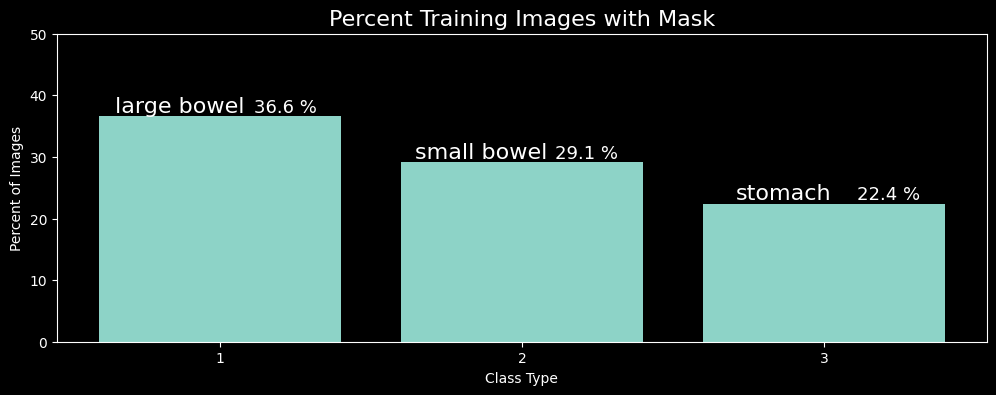

In [32]:
plt.figure(figsize=(12,4))
# specifying "large_bowel","small_bowel","stomach" columns to get the mean of every columns
bar = plt.bar([1,2,3],100*np.mean( df_train.iloc[:,1:4]!='',axis=0))

plt.title('Percent Training Images with Mask', fontsize=16)
plt.ylabel('Percent of Images'); plt.xlabel('Class Type')
plt.xticks([1,2,3])
labels=["large bowel","small bowel","stomach"]

for rect,lbl in zip(bar,labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/3, height,  lbl,
             ha='center', va='bottom',fontsize=16)
    plt.text(rect.get_x() + rect.get_width()/1.3, height, '%.1f %%' % height,
             ha='center', va='bottom',fontsize=13)

plt.ylim((0,50)); plt.show()

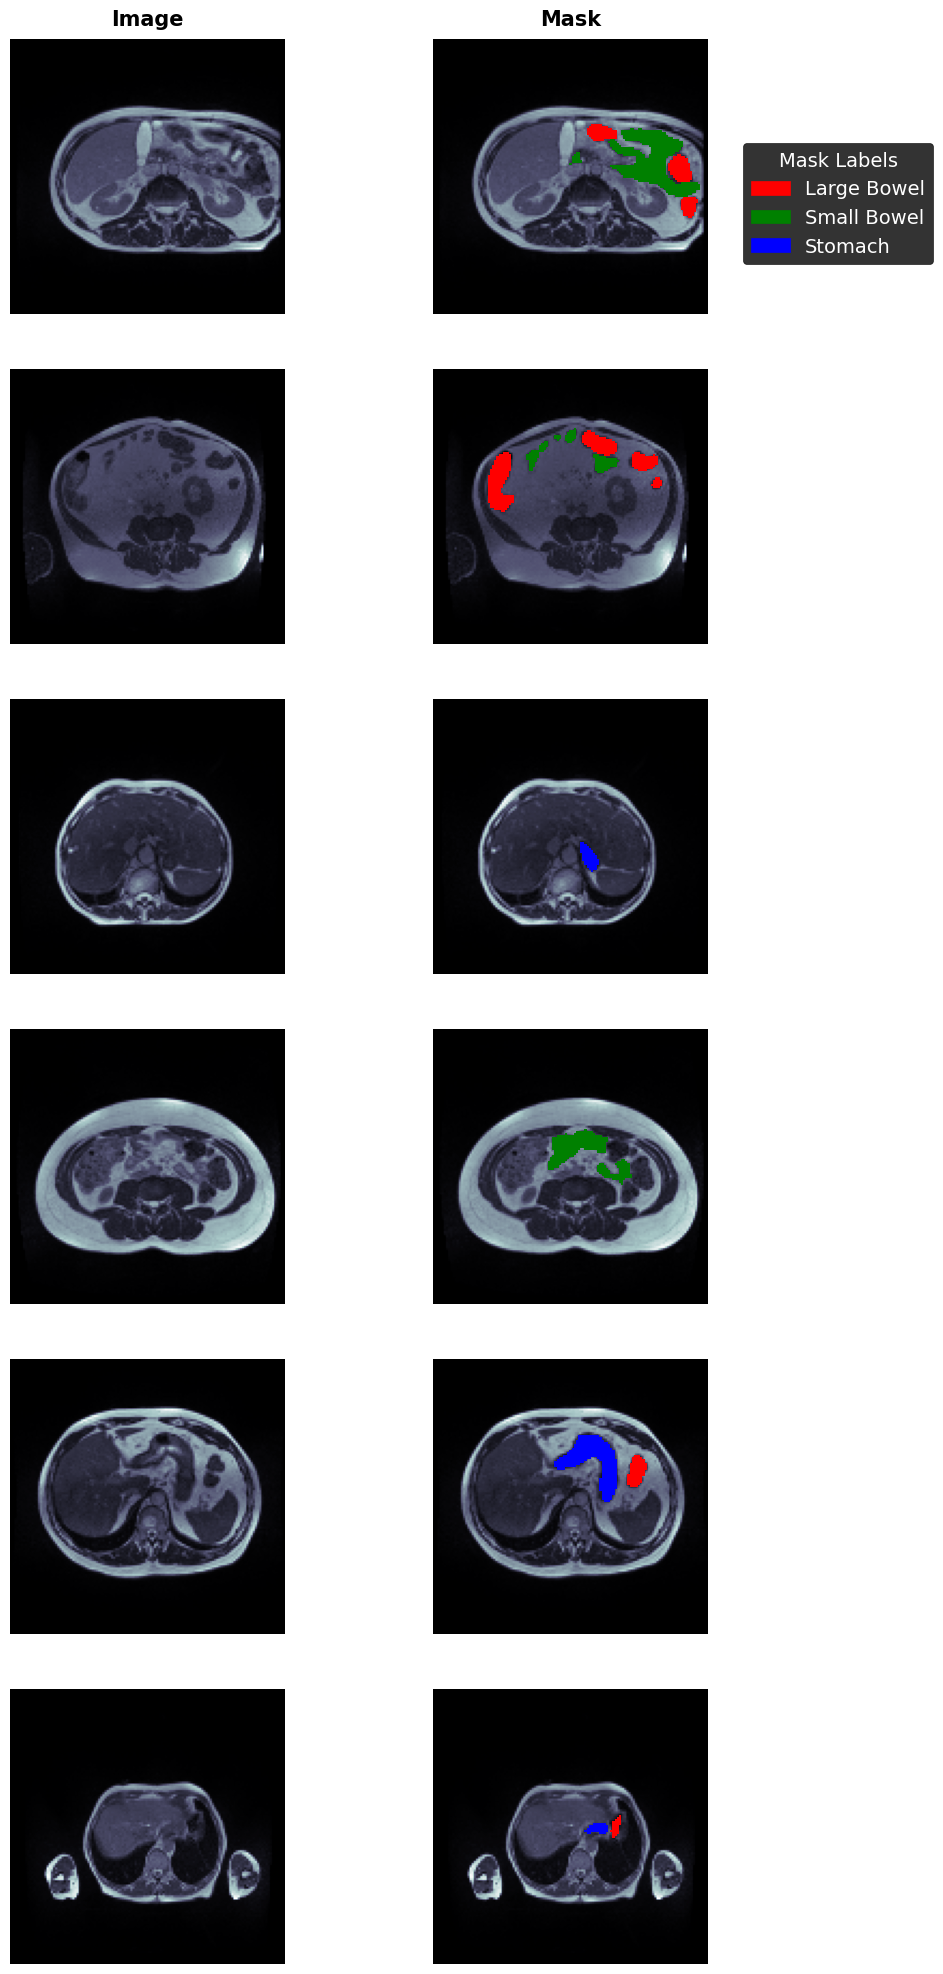

In [9]:
# SAMPLES
# BATCH_SIZE which we are sure that they have mask for large_bowel
Masks = list(df_train[df_train['large_bowel']!=''].sample(BATCH_SIZE).index)
# BATCH_SIZE*2 which we are sure that they have mask for small_bowel
Masks += list(df_train[df_train['small_bowel']!=''].sample(BATCH_SIZE*2).index)
# BATCH_SIZE*3 which we are sure that they have mask for stomach
Masks += list(df_train[df_train['stomach']!=''].sample(BATCH_SIZE*3).index)


# DATA GENERATOR
View_batches = DataGenerator(df_train[df_train.index.isin(Masks)],shuffle=True)

# Visualizing
fig = plt.figure(figsize=(10, 25))
gs = gridspec.GridSpec(nrows=6, ncols=2)
colors = ['red','green','blue']
labels = ["Large Bowel", "Small Bowel", "Stomach"]
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]

cmap1 = mpl.colors.ListedColormap(colors[0])
cmap2 = mpl.colors.ListedColormap(colors[1])
cmap3= mpl.colors.ListedColormap(colors[2])

for i in range(6):
    images, mask = View_batches[i]
    sample_img=images[0,:,:,0]
    mask1=mask[0,:,:,0]
    mask2=mask[0,:,:,1]
    mask3=mask[0,:,:,2]
    
    ax0 = fig.add_subplot(gs[i, 0])
    im = ax0.imshow(sample_img, cmap='bone')

    ax1 = fig.add_subplot(gs[i, 1])
    if i==0:
        ax0.set_title("Image", fontsize=15, weight='bold', y=1.02, color = 'black')
        ax1.set_title("Mask", fontsize=15, weight='bold', y=1.02, color = 'black')
        plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 14,title='Mask Labels', title_fontsize=14, edgecolor="black",  facecolor='black', )

    l0 = ax1.imshow(sample_img, cmap='bone')
    l1 = ax1.imshow(np.ma.masked_where(mask1== False,  mask1),cmap=cmap1, alpha=1)
    l2 = ax1.imshow(np.ma.masked_where(mask2== False,  mask2),cmap=cmap2, alpha=1)
    l3 = ax1.imshow(np.ma.masked_where(mask3== False,  mask3),cmap=cmap3, alpha=1)
    _ = [ax.set_axis_off() for ax in [ax0,ax1]]
    # ax0.set_title("Image", fontsize=15, weight='bold', y=1.02, color= 'black')
    # ax1.set_title("Mask", fontsize=15, weight='bold', y=1.02, color= 'black')
    colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]

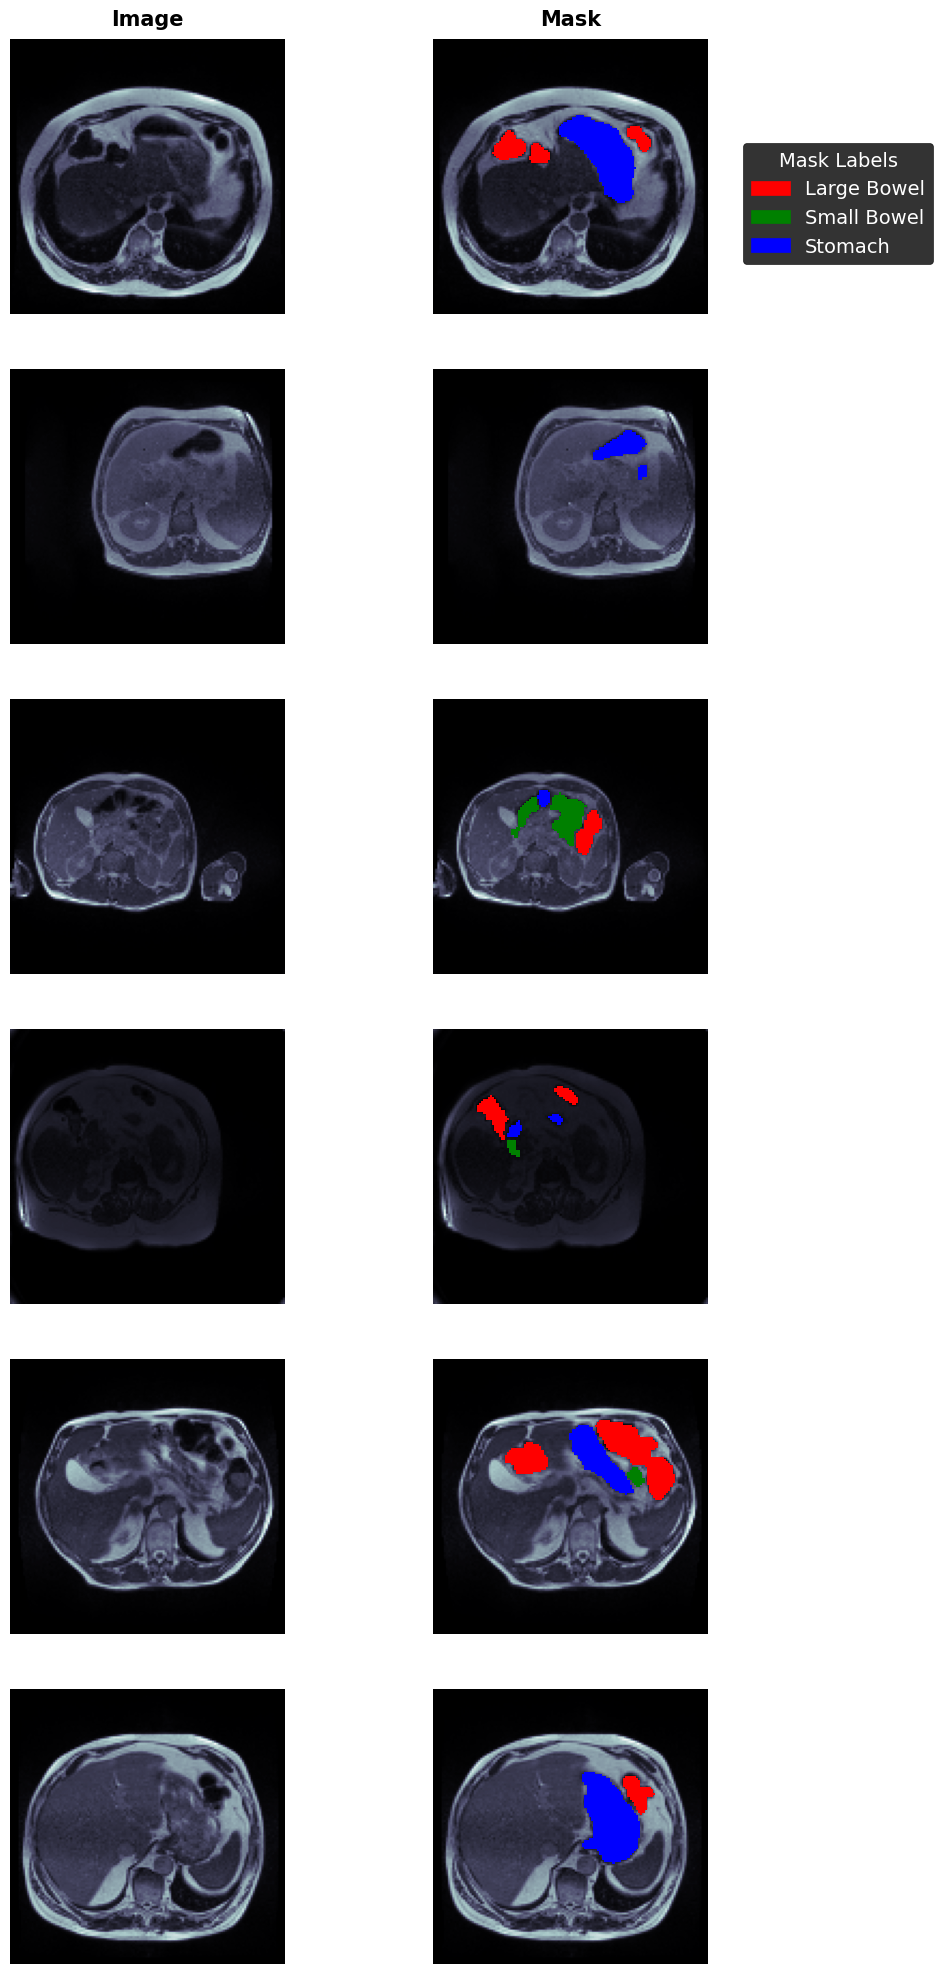

In [18]:
Inspect_data(df_train)

<AxesSubplot: >

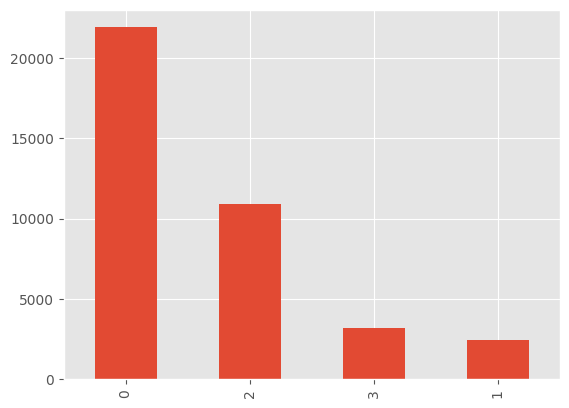

In [11]:
df_train["count"].value_counts().plot.bar()

In [12]:
skf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)
for fold, (_, val_idx) in enumerate(skf.split(X=df_train, y=df_train['count'],groups =df_train['case']), 1):
    df_train.loc[val_idx, 'fold'] = fold
    
    
df_train['fold'] = df_train['fold'].astype(np.uint8)


test_ids = df_train[df_train["count"] == 0].index
train_ids = df_train[(df_train["fold"]!=fold_selected) & (~df_train.index.isin(test_ids))].index
valid_ids = df_train[(df_train["fold"]==fold_selected) & (~df_train.index.isin(test_ids))].index

df_train.groupby('fold').size()

fold
1    7920
2    6624
3    7952
4    8624
5    7376
dtype: int64

In [13]:
print(valid_ids.shape,test_ids.shape,train_ids.shape)

(2777,) (21906,) (13813,)


<AxesSubplot: xlabel='fold,count'>

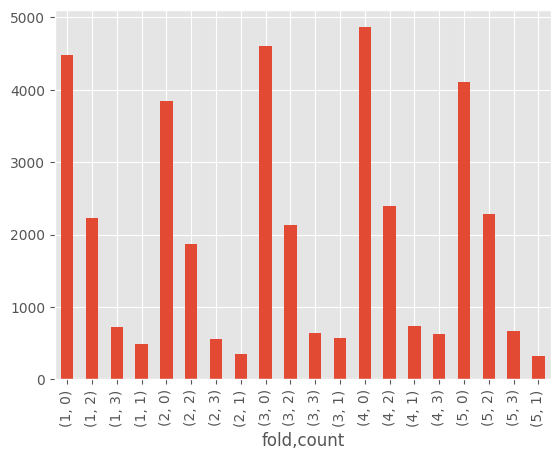

In [12]:
df_train.groupby(['fold'])['count'].value_counts().plot.bar()

<AxesSubplot: >

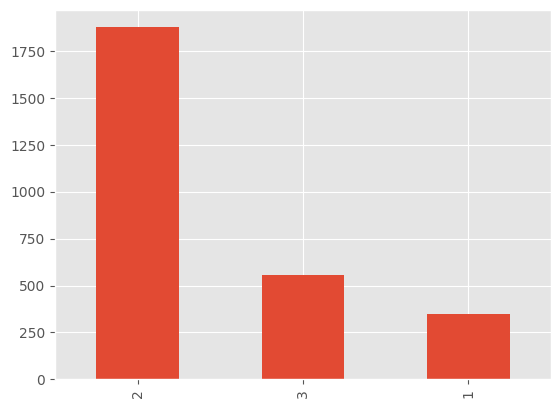

In [13]:
df_train.loc[valid_ids,:]['count'].value_counts().plot.bar()

<AxesSubplot: >

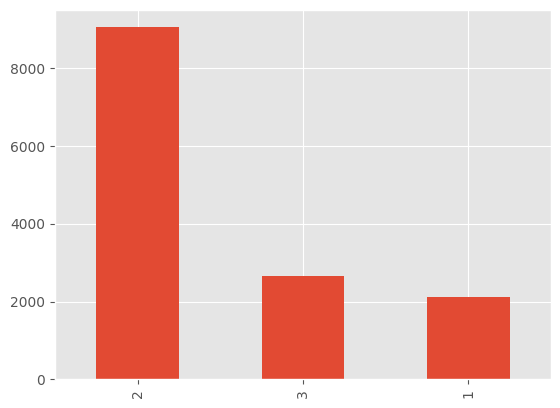

In [14]:
df_train.loc[train_ids,:]['count'].value_counts().plot.bar()

In [17]:
train_generator = DataGenerator(df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator = DataGenerator(df_train[df_train.index.isin(valid_ids)])
# test_generator = DataGenerator(df_train[df_train.index.isin(test_ids)])
# every mask seperated
train_generator0 = DataGenerator1D(0,df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator0 = DataGenerator1D(0,df_train[df_train.index.isin(valid_ids)])

train_generator1 = DataGenerator1D(1,df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator1 = DataGenerator1D(1,df_train[df_train.index.isin(valid_ids)])

train_generator2 = DataGenerator1D(2,df_train[df_train.index.isin(train_ids)],shuffle=True)
val_generator2 = DataGenerator1D(2,df_train[df_train.index.isin(valid_ids)])

In [20]:
model = tf.keras.models.load_model('Models\model0_nocompile.h5', compile = False)
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_coef,f1_score,f2_score,precision,recall,iou_score])


In [21]:
model.evaluate(val_generator)

173/173 [==============================] - 39s 149ms/step - loss: 0.3917 - dice_coef: 0.7747 - f1-score: 0.6465 - f2-score: 0.6486 - precision: 0.6692 - recall: 0.7721 - iou_score: 0.5337


[0.3916933834552765,
 0.7746918201446533,
 0.6464871168136597,
 0.6486296653747559,
 0.6691587567329407,
 0.7720563411712646,
 0.533650279045105]

In [37]:
start = 8 
end = 12


In [47]:
ids = list(valid_ids)

In [39]:
df_train[df_train.index.isin(valid_ids[20:28])].shape

(8, 12)

In [119]:
start = 21
pred_batches = DataGenerator(df_train[df_train.index.isin(list(valid_ids[start:start+1]))],batch_size = 1,shuffle=True)
images, mask = pred_batches[0]
# mask = mask[0,:,:,0]
mask=mask[0,:,:,:]
frame = pred_batches.__getitem__(0)[0]
frame = tf.image.resize(frame, [128, 128], method='nearest').numpy().reshape(128,128,3)

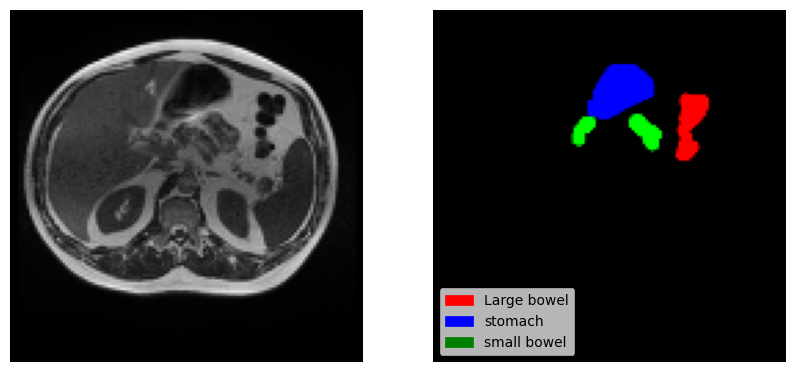

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(frame, cmap='bone')
#* red mask 

ax[1].imshow(mask1, cmap='gray')
ax[0].grid(False)
ax[1].grid(False)
ax[0].set_axis_off()
ax[1].set_axis_off()


plt.legend(handles=[mpatches.Patch(color='red', label='Large bowel'),
                    mpatches.Patch(color='blue', label='stomach'),
                    mpatches.Patch(color='green', label='small bowel')], loc = 'lower left', labelcolor ='black')

plt.show()

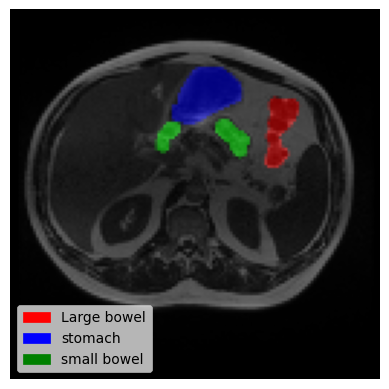

In [139]:
fig, ax = plt.subplots()
im = ax.imshow(frame, cmap='bone')
mask = ax.imshow(mask1, cmap='bone',alpha=0.5)
plt.legend(handles=[mpatches.Patch(color='red', label='Large bowel'),
                    mpatches.Patch(color='blue', label='stomach'),
                    mpatches.Patch(color='green', label='small bowel')], loc = 'lower left', labelcolor ='black')

ax.grid(False)
ax.set_axis_off()
plt.show()

12/12 [==============================] - 1s 63ms/step


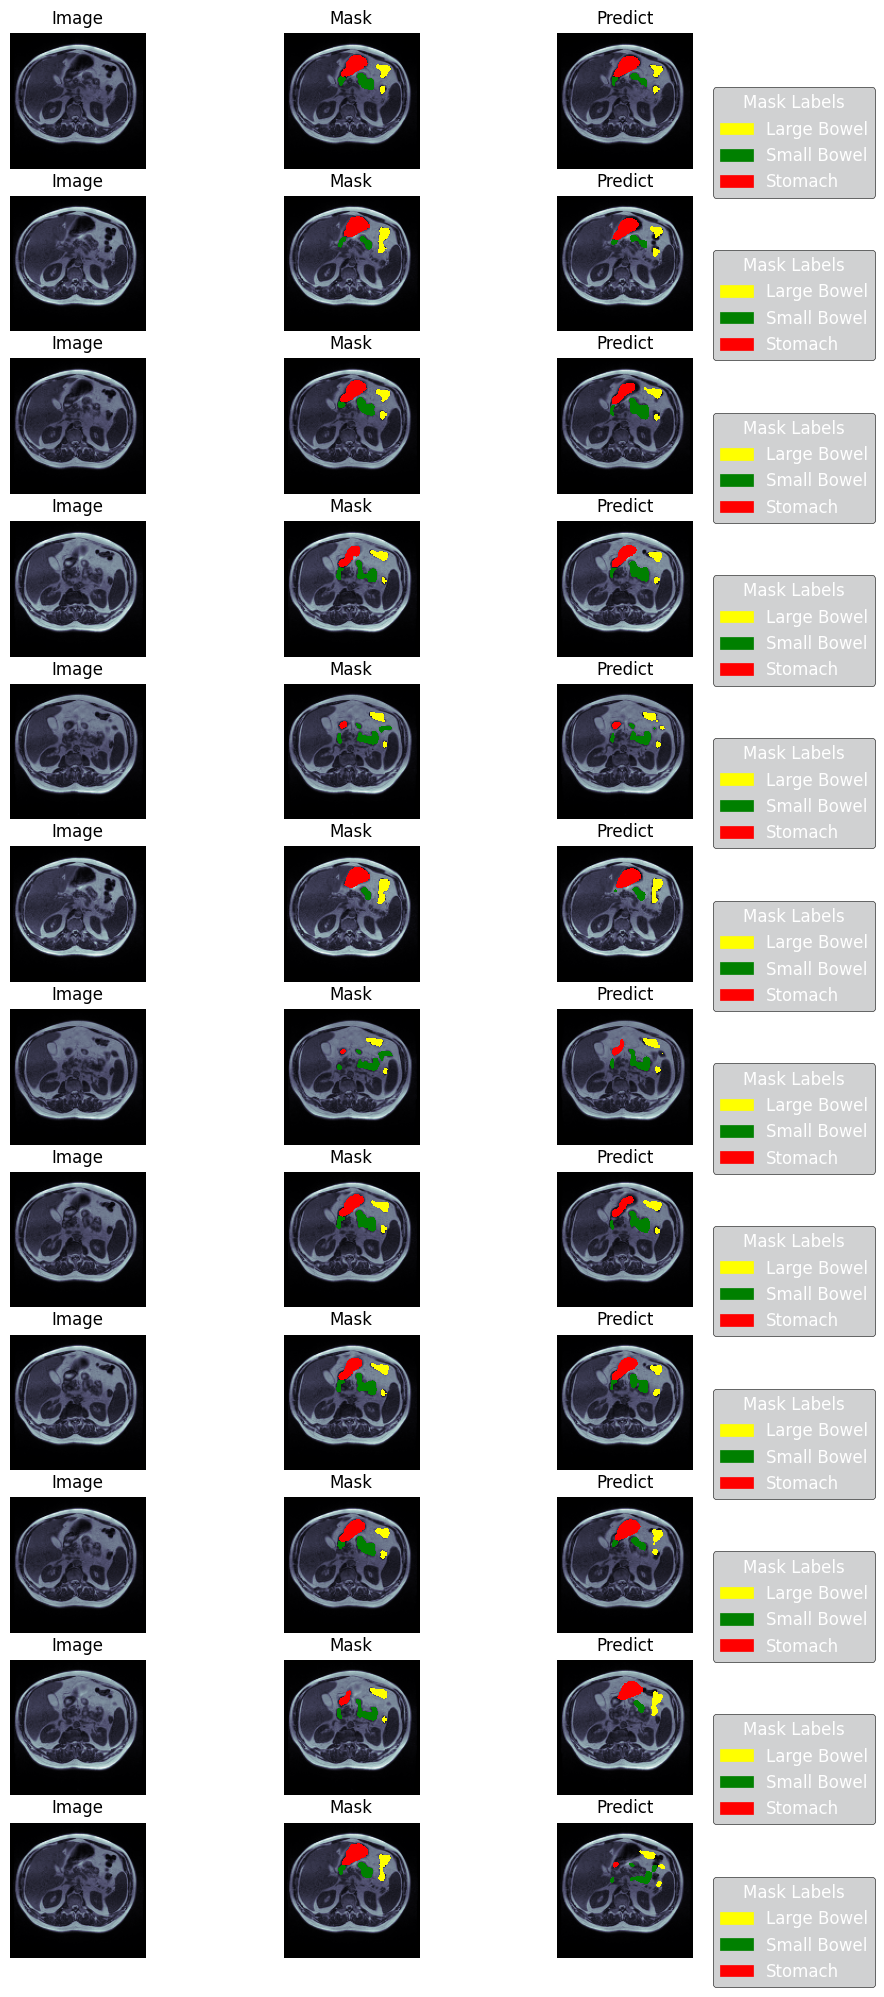

In [118]:
start = 20
end = 32 
pred_batches = DataGenerator(df_train[df_train.index.isin(valid_ids[start:end])],batch_size = 1,shuffle=True)
preds = model.predict_generator(pred_batches,verbose=1)

Threshold = 0.1
# Visualizing
fig = plt.figure(figsize=(10, 25))
gs = gridspec.GridSpec(nrows=end-start, ncols=3)
colors = ['yellow','green','red']
labels = ["Large Bowel", "Small Bowel", "Stomach"]
patches = [ mpatches.Patch(color=colors[i], label=f"{labels[i]}") for i in range(len(labels))]

cmap1 = mpl.colors.ListedColormap(colors[0])
cmap2 = mpl.colors.ListedColormap(colors[1])
cmap3= mpl.colors.ListedColormap(colors[2])

for i in range(end-start):
    images, mask = pred_batches[i]
    sample_img=images[0,:,:,0]
    mask1=mask[0,:,:,0]
    mask2=mask[0,:,:,1]
    mask3=mask[0,:,:,2]
    
    pre=preds[i]
    predict1=pre[:,:,0]
    predict2=pre[:,:,1]
    predict3=pre[:,:,2]
    
    predict1= (predict1 > Threshold).astype(np.float32)
    predict2= (predict2 > Threshold).astype(np.float32)
    predict3= (predict3 > Threshold).astype(np.float32)
    
    ax0 = fig.add_subplot(gs[i, 0])
    im = ax0.imshow(sample_img, cmap='bone')
    ax0.set_title("Image", fontsize=12, y=1.01, color = 'black')
    #--------------------------
    ax1 = fig.add_subplot(gs[i, 1])
    ax1.set_title("Mask", fontsize=12,  y=1.01, color = 'black')
    l0 = ax1.imshow(sample_img, cmap='bone')
    l1 = ax1.imshow(np.ma.masked_where(mask1== False,  mask1),cmap=cmap1, alpha=1)
    l2 = ax1.imshow(np.ma.masked_where(mask2== False,  mask2),cmap=cmap2, alpha=1)
    l3 = ax1.imshow(np.ma.masked_where(mask3== False,  mask3),cmap=cmap3, alpha=1)
    #--------------------------
    ax2 = fig.add_subplot(gs[i, 2])
    ax2.set_title("Predict", fontsize=12, y=1.01, color = 'black')
    l0 = ax2.imshow(sample_img, cmap='bone')
    l1 = ax2.imshow(np.ma.masked_where(predict1== False,  predict1),cmap=cmap1, alpha=1)
    l2 = ax2.imshow(np.ma.masked_where(predict2== False,  predict2),cmap=cmap2, alpha=1)
    l3 = ax2.imshow(np.ma.masked_where(predict3== False,  predict3),cmap=cmap3, alpha=1)
   

    _ = [ax.set_axis_off() for ax in [ax0,ax1,ax2]]
    colors = [im.cmap(im.norm(1)) for im in [l1,l2, l3]]
    plt.legend(handles=patches, bbox_to_anchor=(1.1, 0.65), loc=2, borderaxespad=0.4,fontsize = 12,title='Mask Labels', title_fontsize=12, edgecolor="black",  facecolor='#c5c6c7' )
